In [30]:
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import *
import cv2
from PIL import Image, ImageTk
import pandas as pd
import numpy as np
import imutils
import os

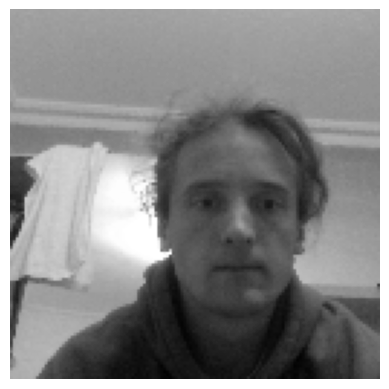

In [36]:
cropped_image = np.array(0)
#---------------mettre l'image au bonne dimension--------------------------------
def convert_image480_data(pixel_list):
    # Suppose que les données d'image sont stockées en format 1D
    # Reshape en 3D (480, 640, 3)
    image_array = np.array(pixel_list).reshape((480, 640, 3))
    
    # Rogner l'image pour obtenir une taille finale de (480, 480, 3)
    cropped_image = image_array[:, 80:560, :]
    
    return cropped_image
def retailler_img(img=cropped_image, size=(128, 128)):
    # Redimensionner l'image en 128x128
    resized_image = cv2.resize(img, size)

    # Convertir en noir et blanc
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    return gray_image
#--------------------------------------------------------------------------------

# Créer une fenêtre Tkinter
fenetre = tk.Tk()
fenetre.geometry("1500x900")
fenetre.title("Video")
fenetre.resizable(height=False, width=False)
fenetre.config(background='#41B77F')

# Déclaration globale de la capture vidéo
video = None

# Déclaration de la variable pour stocker la dernière image capturée
derniere_image = None

# DataFrame pandas pour stocker les images
df_images = pd.DataFrame(columns=['Image'])

# Limite maximale d'images dans le DataFrame
MAX_IMAGES = 10

# Fonction pour démarrer le flux vidéo
def video_stream():
    global video
    video = cv2.VideoCapture(0)
    lancer()

# Fonction pour afficher le flux vidéo dans l'interface
def lancer():
    global video
    ret, frame = video.read()
    if ret == True:
        etq_de_video.place(x=20, y=15)
        frame = imutils.resize(frame, width=640)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame)
        image = ImageTk.PhotoImage(image=img)
        etq_de_video.configure(image=image)
        etq_de_video.image = image
        etq_de_video.after(10, lancer)
    else:
        video.release()

# Fonction pour prendre une photo
def prendre_photo():
    global derniere_image, df_images

    if len(df_images) >= MAX_IMAGES:
        print(f"Le nombre maximum d'images ({MAX_IMAGES}) a été atteint.")
        return

    if video:
        ret, frame = video.read()
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            derniere_image = Image.fromarray(frame_rgb)

            # Convertir l'image en tableau NumPy
            image_np = np.array(derniere_image)
            # Aplatir l'image en un vecteur unidimensionnel
            image_flat = image_np.flatten()

            # Ajouter l'image au DataFrame
            df_images.loc[len(df_images)] = [image_flat]

            # Afficher la dernière image capturée dans un label
            image_tk = ImageTk.PhotoImage(image=derniere_image)
            etq_photo.configure(image=image_tk)
            etq_photo.image = image_tk
    return df_images 

def im_pour_model(df = df_images):
    image_data = df_images['Image'].iloc[0]
    cropped_image = convert_image480_data(image_data)
    model_image = retailler_img(img=cropped_image, size=(128, 128))
    if os.path.exists("Photo_128.jpg"):
        os.remove("Photo_128.jpg")
    cv2.imwrite('Photo_128.jpg', model_image)
    plt.imshow(model_image, cmap="gray")
    plt.axis('off')
    plt.show()
    return model_image

# Fonction pour arrêter la capture vidéo
def quitter():
    global video
    etq_de_video.place_forget()
    if video:
        video.release()

# Couleur des boutons
couleur_btn = "#5e17eb"

# Bouton pour démarrer la vidéo
bouton_demarrer = tk.Button(fenetre, text="Démarrer la vidéo", bg=couleur_btn, command=video_stream, width=20, height=5, font=("Courier", 12, "bold"))
bouton_demarrer.place(x=100, y=590)

# Bouton pour prendre une photo
bouton_photo = tk.Button(fenetre, text="Prendre une photo", bg=couleur_btn, command=prendre_photo, width=20, height=5, font=("Courier", 12, "bold"))
bouton_photo.place(x=450, y=590)

#Bouton sauvegarder photo
bouton_quitter = tk.Button(fenetre, text="Sauvegarder la photo", bg=couleur_btn, command=im_pour_model, width=20, height=5, font=("Courier", 12, "bold"))
bouton_quitter.place(x=800, y=590)

# Bouton pour quitter la vidéo
bouton_quitter = tk.Button(fenetre, text="Quitter la vidéo", bg=couleur_btn, command=quitter, width=20, height=5, font=("Courier", 12, "bold"))
bouton_quitter.place(x=1150, y=590)

# Label pour afficher le flux vidéo
etq_de_video = tk.Label(fenetre, bg="black")
etq_de_video.place(x=20, y=15)

# Label pour afficher la dernière photo capturée
etq_photo = tk.Label(fenetre, bg="black")
etq_photo.place(x=800, y=15)

# Lancement de la boucle principale Tkinter
fenetre.mainloop()
